# Weather Project - Rain  Precipation between Seattle and Honolulu - Exploratory Data Analysis

In this notebook, we will perform exploratory data analysis (EDA) on previously cleaned dataset containing daily rain precipitation data for Seattle and Honolulu from 2018 to 2022.

## Project Overview
This report analyzes daily rain precipitation between Seattle and Honolulu in 2018 - 2022. It will compare rain precipitation between the two cities and determine if Honolulu gets more rain than Seattle. The report would initially compare total daily rain precipitation between the two cities and then analyze how it varies on a monthly basis evaluating seasonal trends, and variability.

## Import Libraries

Import common libraries for data analysis and visualization.

In [39]:
# Import pandas, numpy, and matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# seaborn is a data visualization library built on matplotlib
import seaborn as sns

# set the plotting style
sns.set_style("whitegrid")


# Set color palette (choose one)
sns.set_palette("deep")

## Load cleaned data

Load the cleaned weather data for Seattle and Honolulu from CSV file.

In [40]:
df = pd.read_csv('https://raw.githubusercontent.com/JLichwa80/weather/refs/heads/main/data/seattle_honolulu_rain_clean.csv')

# Convert the 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

In [41]:
df

,date,city,precipitation,day_of_year
0,2018-01-01,Seattle,0.00,1
1,2018-01-02,Seattle,0.00,2
2,2018-01-03,Seattle,0.00,3
3,2018-01-04,Seattle,0.00,4
4,2018-01-05,Seattle,0.25,5
...,...,...,...,...
3647,2022-12-27,Honolulu,0.00,361
3648,2022-12-28,Honolulu,0.00,362
3649,2022-12-29,Honolulu,0.00,363
3650,2022-12-30,Honolulu,0.00,364


## Analyze the data to compare rain precipitation between Seattle and Honolulu

### Visualizing Daily Rain Precipitation for Seattle and Honolulu

Hewre we plot the daily rain precipitation for both cities over the entire time period to visually compare their patterns.

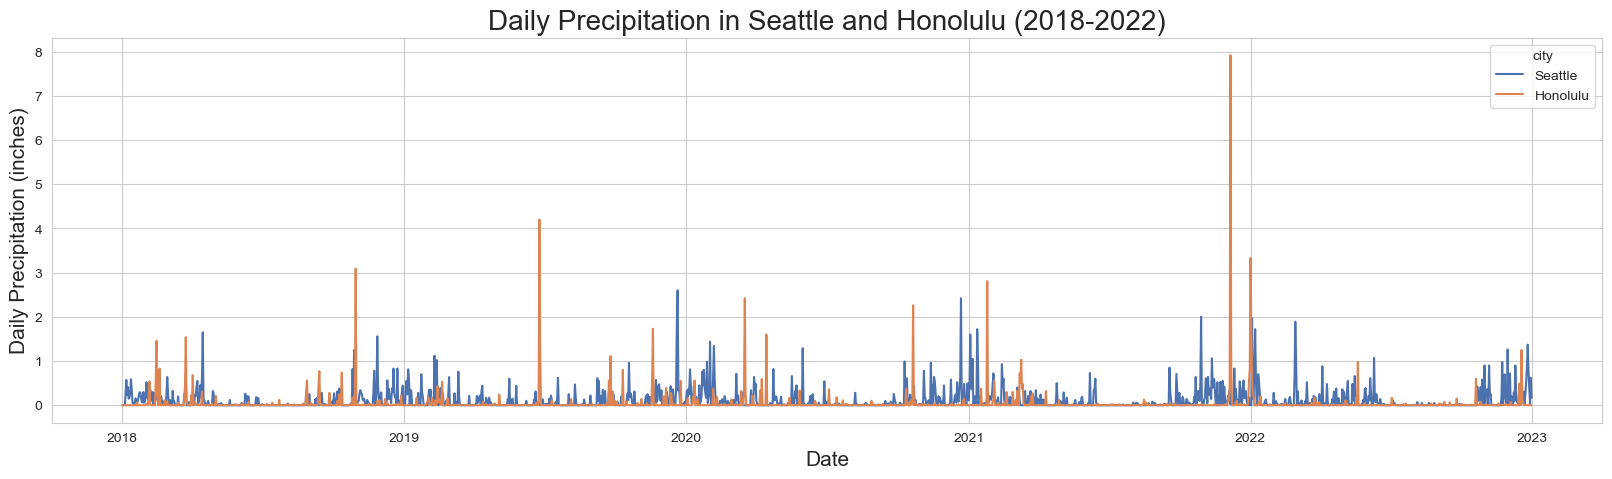

In [59]:
plt.figure(figsize=(20,5))
sns.lineplot(data=df, x='date', y='precipitation', hue='city')
plt.xlabel('Date', fontsize=15)
plt.ylabel('Daily Precipitation (inches)', fontsize=15)
plt.title('Daily Precipitation in Seattle and Honolulu (2018-2022)', fontsize=20)
plt.show()


From line plot like previously shown on individual graphs, that Seattle generally receives more rain than Honolulu throughout the year. Honolulu from other hand heavier rain days occasionally which indicate storm events.

### Compare total rain precipitation between Seattle and Honolulu

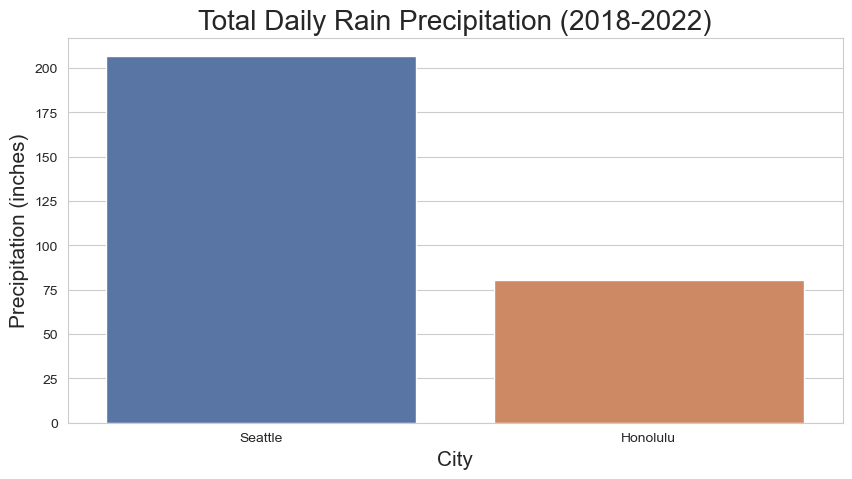

In [60]:
# Calculate total precipitation by city and convert data series to data frame
total_precip = df.groupby('city')['precipitation'].sum().sort_values(ascending=False).reset_index()

plt.figure(figsize=(10,5))
sns.barplot(data=total_precip, x='city', y='precipitation',hue='city')

plt.xlabel('City', fontsize=15)
plt.ylabel('Precipitation (inches)', fontsize=15)
plt.title('Total Daily Rain Precipitation (2018-2022)', fontsize=20)
plt.show()

From above we can see that Seattle had over 200 inches of rain over the 5 year period compared to Honolulu's approximately 75 inches which is almost 3 times less. This indicates that Seattle is significantly rainier than Honolulu overall.

#### Numerical summary statistics for rain precipitation

In [61]:
df[['city', 'precipitation']].groupby('city').describe()

precipitation                                                
                 count      mean       std  min  25%   50%   75%   max
city                                                                  
Honolulu        1826.0  0.044195  0.287316  0.0  0.0  0.00  0.00  7.92
Seattle         1826.0  0.113270  0.240516  0.0  0.0  0.01  0.12  2.60

From the table above, we see that during storm events Honolulu can receive 3 times more rain in a single day compared to Seattle. However, Seattle has a higher average daily rain precipitation and more rainy days overall. We can also notice that Honolulu has higher standard deviation indicating more variability in daily rain precipitation compared to Seattle.

### Compare  number of days with rain precipitation between Seattle and Honolulu

As we concluded that in terms of total Seattle has more inches of rain. Here we will check the number of days with rain precipitation in both cities to see which city experiences more rainy days.

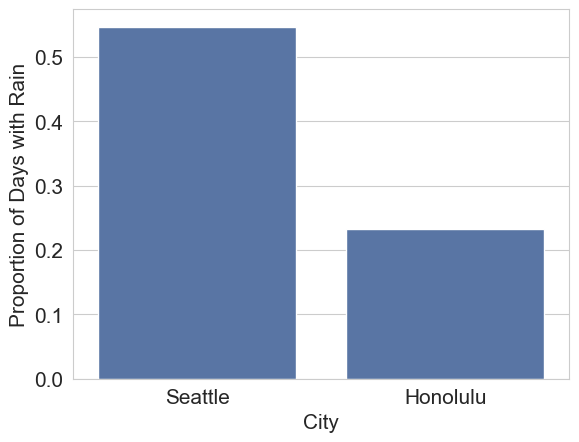

In [71]:
df['any_rain'] = df['precipitation'] > 0

sns.barplot(data=df, x='city',y='any_rain',errorbar=None)

plt.xlabel('City', fontsize=15)
plt.ylabel('Proportion of Days with Rain', fontsize=15)

plt.tick_params(labelsize=15)

plt.show()

From above we can conlude that Seattle has more than double the number of days with rain compared to Honolulu. Let's visualize how that looks on monthly basis.

#### Number of days with rain precipitation by month

Let's look if there are any months where Honolulu has more rainy days than Seattle.

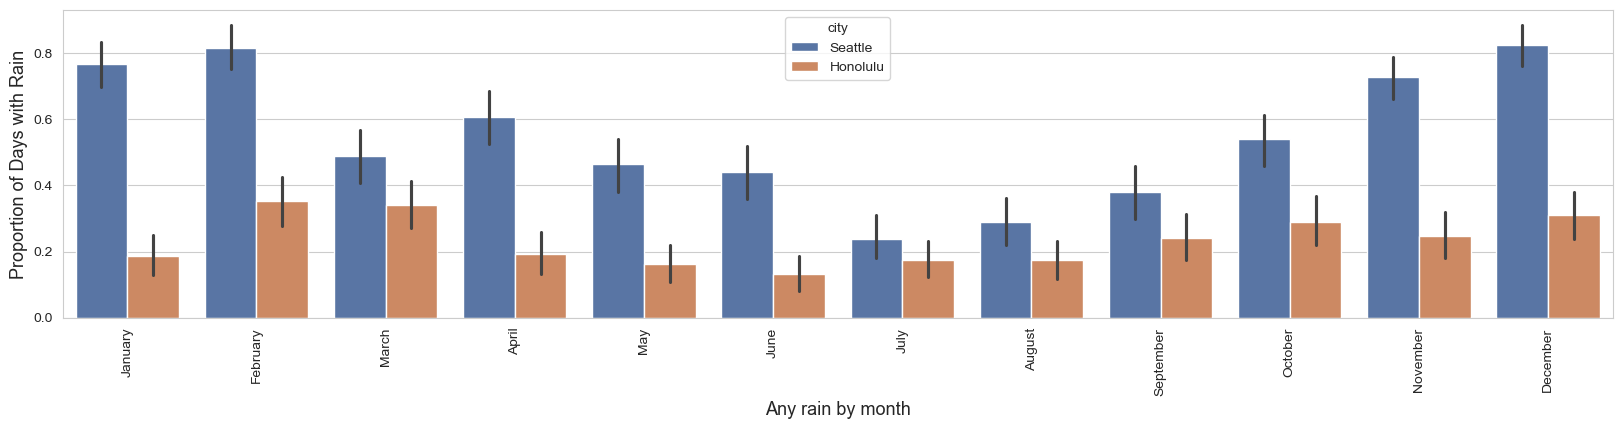

In [75]:
# Analyzing number of days withwithout rain precipitation by month
plt.figure(figsize=(20,4))

sns.barplot(data=df, x='month', y='any_rain', hue='city')

plt.xlabel("Any rain by month", fontsize=13)
plt.ylabel("Proportion of Days with Rain", fontsize=13)

import calendar
month_names = list(calendar.month_name)[1:]

plt.xticks(ticks=range(12), labels=month_names, rotation=90)
plt.show()

We can again see that Seattle has more rainy days in any given month compared to Honolulu. The difference is especially visible during the winter months from November to March when Seattle experiences significantly more rainy days. Based on the whiskers we can also see that Seattle has higher variability in number of rainy days per month compared to Honolulu.

### Periodical rain precipitation trends and seasonality analysis

Now we will analyze trends in rain precipation on a monthly basis to see if there are any seasonal patterns. We will also look at variability in rain precipitation between years.

In [62]:
#Add month and yeear columns to dataframe
df['month'] = pd.to_datetime(df['date']).dt.month
df['year'] = pd.to_datetime(df['date']).dt.year
df

,date,city,precipitation,day_of_year,month,year,any_rain
0,2018-01-01,Seattle,0.00,1,1,2018,False
1,2018-01-02,Seattle,0.00,2,1,2018,False
2,2018-01-03,Seattle,0.00,3,1,2018,False
3,2018-01-04,Seattle,0.00,4,1,2018,False
4,2018-01-05,Seattle,0.25,5,1,2018,True
...,...,...,...,...,...,...,...
3647,2022-12-27,Honolulu,0.00,361,12,2022,False
3648,2022-12-28,Honolulu,0.00,362,12,2022,False
3649,2022-12-29,Honolulu,0.00,363,12,2022,False
3650,2022-12-30,Honolulu,0.00,364,12,2022,False


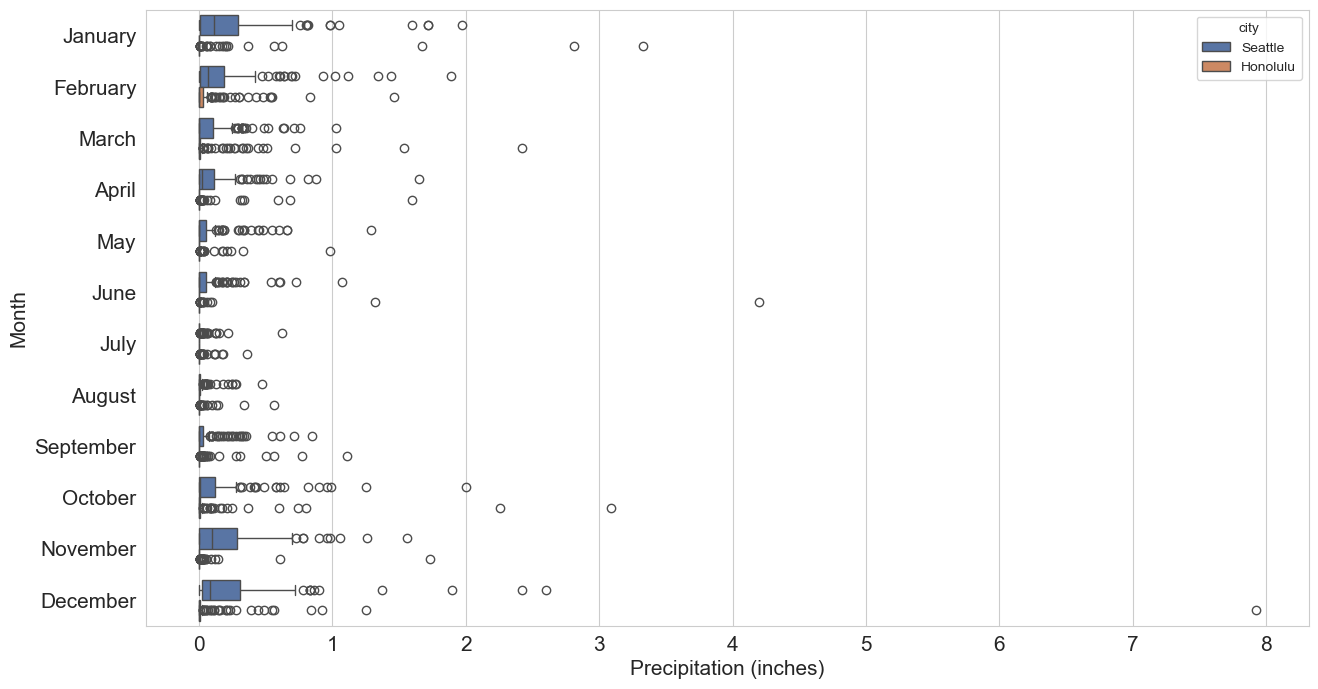

In [ ]:
#Horizontal visualization of above boxplot.
plt.figure(figsize=(15, 8))

sns.boxplot(data=df, x='precipitation', y='month', hue='city', orient='h')

plt.ylabel('Month', fontsize=15)
plt.xlabel('Precipitation (inches)', fontsize=15)

plt.tick_params(labelsize=15)



plt.yticks(ticks=range(12), labels=month_names)

plt.show()


From the plot above, we can see significant amount of rain in Seattle November through February which indicates a wet season during the winter months. The summer months from June to September are relatively dry with very little rain.Honolulu 25th-75th percentile boxes are barely visible in this scale indicating lower rain precipation in comparison to Seattle. We can only cleary observe outliers for Honolulu which is represented by small cirles which rich upt to 8 inches in December.

#### Reduced scale to better visualize Honolulu rain precipitation

Due to large difference in rain precipitation between Seattle and Honolulu, we will reduce the scale of the y-axis to better visualize Honolulu rain precipitation patterns.

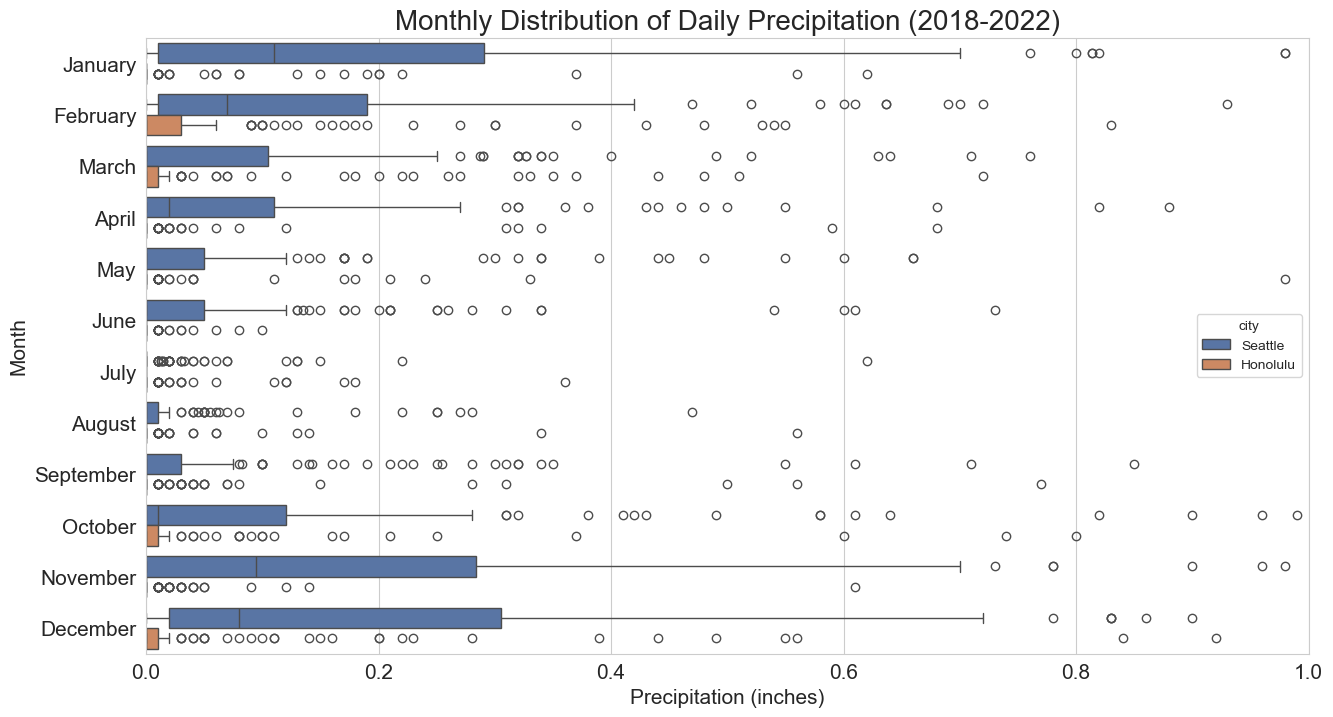

In [64]:
# Zoom in to show daily rain precipitation trends for each month (ignoring far out outliers)
plt.figure(figsize=(15, 8))

sns.boxplot(data=df, x='precipitation', y='month', hue='city', orient='h')

plt.ylabel('Month', fontsize=15)
plt.xlabel('Precipitation (inches)', fontsize=15)
plt.title('Monthly Distribution of Daily Precipitation (2018-2022)', fontsize=20)
plt.tick_params(labelsize=15)

plt.yticks(ticks=range(12), labels=month_names)
plt.xlim(0,1)  # Adjust x-axis limit to zoom in
plt.show()


In reduced scale plot above, we can better observe montly rain precipation patterns for Honolulu. We can see that Honolulu experiences more rain during the winter months from October to March with a peak on 25th-75th percentile in February. Suprisingly not much rain in November and January. We can also see median for Seattle being generally below middle of the box indicating skewness towards lower rain precipation values. 

In [ ]:
### Average vs Median Precipitation by Month
mean_median = df.groupby(['city'])['precipitation'].agg(['mean', 'median'])
mean_median.round(2)


,mean,median
city,,
Honolulu,0.04,0.00
Seattle,0.11,0.01


Table above indicates that median rain precipation is much higher than mean rain precipation for Seattle indicating that there are significant number of low rain precipation days which skew the mean downwards. Honolulu on the other hand has median and mean values much closer together indicating more consistent rain precipation levels.

### Deeper analysis for months of wet months (November - February)



As we concluded that Seattle generally recieves more rain than Honolulu, in total, monthly basis, and in number of rainy days. Considering noticed variablity in Seatlle, we will now perform deeper analysis for the wettest months from November to February to see how rain precipation varies in each year.

#### Analyze months variation per year years


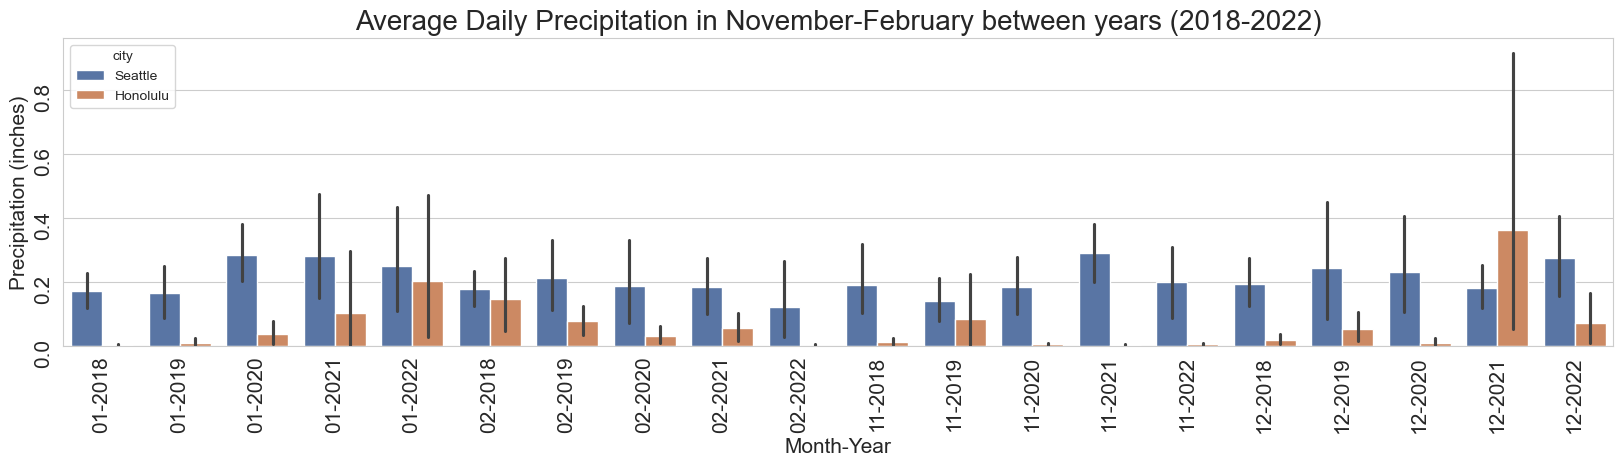

In [76]:
# Filter data frame
df_nov_feb = df.loc[df[ 'month'].isin([11, 12, 1, 2])].copy()


df_nov_feb['month_year'] =  (
    df_nov_feb['month'].map('{:02d}'.format) + '-' +
    df_nov_feb['year'].map('{:04d}'.format))

# Order by month
df_nov_feb = df_nov_feb.sort_values(['month', 'city'], ascending=[True, False])


plt.figure(figsize=(20, 4))

sns.barplot(data=df_nov_feb, x='month_year', y='precipitation', hue='city')

plt.xlabel('Month-Year', fontsize=15)
plt.ylabel('Precipitation (inches)', fontsize=15)
plt.title('Average Daily Precipitation in November-February between years (2018-2022)', fontsize=20)

plt.tick_params(labelsize=15,rotation=90)


plt.show()



From above we can notice that there is no significant difference in the monthly variation across years for Seattle, and variations are mostly within the month. For Honolulu, we can see that 2021 and 2022 significantly higher with 2021 December rain precipitation was higher than Seattle.

## Conclusion


After performing exploratory data analysis on daily rain precipitation data for Seattle and Honolulu from 2018 to 2022, we can conclude that Seattle receives  more rain than Honolulu from any angle. Seattle has higher total rain precipitation, more rainy days, and higher average daily rain levels compared to Honolulu. Seasonal patterns indicate that Seattle experiences a wet season during the winter months from November to February, while Honolulu has a milder seasonal variation with slightly more rain during the winter months. Variability in rain precipitation is also higher in Seattle compared to Honolulu. Overall, the analysis confirms that Seattle is a much rainier city than Honolulu across multiple dimensions of rain precipitation.